In [1]:
# Import the appropriate packages for the project
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from nba_api.stats.endpoints import shotchartdetail
import json
import math
import colorcet as cc
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Query the nba_api for the data on all the shots attempted during the 2020-21 NBA regular season
response = shotchartdetail.ShotChartDetail(
	context_measure_simple='FGA',
	team_id=0,
	player_id=0,
	season_nullable='2020-21',
	season_type_all_star='Regular Season'
)

content = json.loads(response.get_json())

In [3]:
# transform contents into dataframe, shots_df, that has the shot data for 2020-21
results = content['resultSets'][0]
headers = results['headers']
rows = results['rowSet']
shots_df = pd.DataFrame(rows)
shots_df.columns = headers

In [4]:
# Query the nba_api for the data on all the shots attempted during the 2010-11 NBA regular season
response = shotchartdetail.ShotChartDetail(
	context_measure_simple='FGA',
	team_id=0,
	player_id=0,
	season_nullable='2010-11',
	season_type_all_star='Regular Season'
)

content = json.loads(response.get_json())

In [5]:
# transform contents into dataframe, shots_df_10, that has the shot data for 2010-11
results = content['resultSets'][0]
headers = results['headers']
rows = results['rowSet']
shots_df_10 = pd.DataFrame(rows)
shots_df_10.columns = headers

In [6]:
# Save the dataframes as CSV files
shots_df.to_csv('Data/shots.csv', index = False)
shots_df_10.to_csv('Data/shots_10.csv', index = False)

In [7]:
# Create a new column 'year' in both of the dataframes that has the year that the shot is from
shots_df['year'] = '2020-21'
shots_df_10['year'] = '2010-11'

In [8]:
shots_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,year
0,Shot Chart Detail,0022000001,12,202681,Kyrie Irving,1610612751,Brooklyn Nets,1,11,22,...,16-24 ft.,22,-2,220,1,1,20201222,BKN,GSW,2020-21
1,Shot Chart Detail,0022000001,13,1630164,James Wiseman,1610612744,Golden State Warriors,1,11,11,...,Less Than 8 ft.,0,9,-2,1,1,20201222,BKN,GSW,2020-21
2,Shot Chart Detail,0022000001,16,201142,Kevin Durant,1610612751,Brooklyn Nets,1,10,49,...,24+ ft.,25,-20,258,1,1,20201222,BKN,GSW,2020-21
3,Shot Chart Detail,0022000001,18,203952,Andrew Wiggins,1610612744,Golden State Warriors,1,10,31,...,24+ ft.,23,235,46,1,0,20201222,BKN,GSW,2020-21
4,Shot Chart Detail,0022000001,20,201142,Kevin Durant,1610612751,Brooklyn Nets,1,10,23,...,Less Than 8 ft.,4,48,13,1,1,20201222,BKN,GSW,2020-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190978,Shot Chart Detail,0022001080,651,1630163,LaMelo Ball,1610612766,Charlotte Hornets,4,0,48,...,24+ ft.,23,-234,23,1,0,20210516,WAS,CHA,2020-21
190979,Shot Chart Detail,0022001080,660,1629060,Rui Hachimura,1610612764,Washington Wizards,4,0,24,...,8-16 ft.,15,5,150,1,0,20210516,WAS,CHA,2020-21
190980,Shot Chart Detail,0022001080,663,201577,Robin Lopez,1610612764,Washington Wizards,4,0,23,...,Less Than 8 ft.,0,6,-1,1,0,20210516,WAS,CHA,2020-21
190981,Shot Chart Detail,0022001080,673,1628984,Devonte' Graham,1610612766,Charlotte Hornets,4,0,13,...,24+ ft.,25,169,194,1,0,20210516,WAS,CHA,2020-21


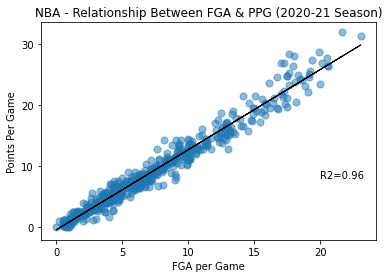

<Figure size 720x576 with 0 Axes>

In [9]:
from nba_api.stats.endpoints import leagueleaders
from sklearn import linear_model

# Here we access the leagueleaders module through endpoints & assign the class to "data"
data = leagueleaders.LeagueLeaders(
    season = '2020-21',
    season_type_all_star = 'Regular Season'
) 

# Our "data" variable now has built in functions such as creating a dataframe for our data
df21 = data.league_leaders.get_data_frame()

# Create a variable for points per game 
df21['PPG'] = df21['PTS'] / df21['GP']

# First we need to get per game stats.
# We divide each variable by games played (GP) to get per game average
x, y = df21.FGA/df21.GP, df21.PTS/df21.GP 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     

""" Build and fit linea regression model """
# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)   

# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=50, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black', linewidth=1)                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA & PPG (2020-21 Season)')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(20,8, f'R2={r2}')                                   # 10, 25 are the coordinates for our text. Adjust accordingly
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
print('')

In [10]:
import heapq
import random

# create an array of values 'score'
# These values were (POINTS PER GAME - EXPECTED POINTS PER GAME)
# In other words, the players who were BEST outperforming our line of regression

score = (y - predicted_y)

# Using heapq to find the indexes of the 10 largest PPG - ExPPG in the NBA (most efficient players) and storing
# Them to player_index
player_index = heapq.nlargest(11, range(len(score)), score.take)

# A new list to store information from the original DataFrame
most_efficient21 = []

# Using our original DataFrame, appending all player information for my 10 most efficient players to my
# 'most_efficient' list
for i in range(len(player_index)):
    most_efficient21.append(df21.loc[player_index[i]])

# Creating a new DataFrame called 'most_efficient_DF' from my 'most_efficient' list
most_efficient21_DF = pd.DataFrame(most_efficient21)

# Creating a filter for at least 500 shot attempts
most_efficient21_DF = most_efficient21_DF[most_efficient21_DF['FGA'] > 600]

# Resetting player_index list so that it only contains those with at least 500 shot attempts
#player_index = most_efficient21_DF.index

In [11]:
# Resetting player_index list so that it only contains those with at least 500 shot attempts
player_index21 = most_efficient21_DF.index

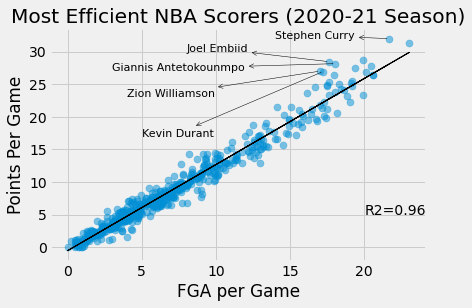

<Figure size 1728x1152 with 0 Axes>

In [12]:
# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=50, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black', linewidth=1)                    # line: Add line for regression line w/ predicted values
plt.title('Most Efficient NBA Scorers (2020-21 Season)')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(20,5, f'R2={r2}')                                  # 10, 25 are the coordinates for our text. Adjust accordingly


plt.annotate(most_efficient21_DF.PLAYER[player_index21[0]], 
                 (x[player_index21[0]], y[player_index21[0]]), 
                 (8, 30),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(most_efficient21_DF.PLAYER[player_index21[1]], 
                 (x[player_index21[1]], y[player_index21[1]]), 
                 (4, 23),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(most_efficient21_DF.PLAYER[player_index21[4]], 
                 (x[player_index21[4]], y[player_index21[4]]), 
                 (14, 32),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(most_efficient21_DF.PLAYER[player_index21[2]], 
                 (x[player_index21[2]], y[player_index21[2]]), 
                 (3, 27),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(most_efficient21_DF.PLAYER[player_index21[3]], 
                 (x[player_index21[3]], y[player_index21[3]]), 
                 (5, 17),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)


    # plt.annotate(most_efficient21_DF.PLAYER[player_index21[i]], 
    #              (x[player_index21[i]], y[player_index21[i]]), 
    #              (x[player_index21[i]]-random.randint(0,11), y[player_index21[i]]-random.randint(0,14)),
    #              arrowprops=dict(arrowstyle='-', color = 'black'))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(24, 16))
print(' ')

In [13]:
most_efficient21_DF['PPG - ExPPG'] = score[player_index21]
most_efficient21_DF.loc[:,'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG,PPG - ExPPG
15,Joel Embiid,PHI,51,1585,461,899,0.513,58,154,0.377,...,50,69,159,123,1451,1580,0.91,0.31,28.450980,5.707362
9,Zion Williamson,NOP,61,2026,634,1037,0.611,10,34,0.294,...,57,39,167,135,1647,1680,1.35,0.34,27.000000,5.083943
5,Giannis Antetokounmpo,MIL,61,2013,626,1100,0.569,67,221,0.303,...,72,73,207,168,1717,2026,1.73,0.35,28.147541,4.869315
63,Kevin Durant,BKN,35,1157,324,603,0.537,85,189,0.450,...,25,45,120,70,943,1028,1.63,0.21,26.942857,4.725331
0,Stephen Curry,GSW,63,2152,658,1365,0.482,337,801,0.421,...,77,8,213,119,2015,1855,1.70,0.36,31.984127,3.913086
46,Jimmy Butler,MIA,52,1745,366,736,0.497,25,102,0.245,...,108,18,109,71,1116,1434,3.38,0.99,21.461538,3.299345
2,Nikola Jokic,DEN,72,2488,732,1293,0.566,92,237,0.388,...,95,48,222,192,1898,2585,2.70,0.43,26.361111,3.181084
49,James Harden,BKN,44,1609,342,734,0.466,121,334,0.362,...,53,33,177,99,1083,1378,2.68,0.30,24.613636,3.117237
1,Damian Lillard,POR,67,2398,602,1334,0.451,275,704,0.391,...,62,17,203,102,1928,1825,2.49,0.30,28.776119,3.021400


In [14]:
# create an array of values 'score'
# These values were (POINTS PER GAME - EXPECTED POINTS PER GAME)
# In other words, the players who were least outperforming our line of regression while taking 500 shots

score = (y - predicted_y)

# Using heapq to find the indexes of the 10 smallest PPG - ExPPG in the NBA (least efficient players) and storing
# Them to player_index
player_index21_2 = heapq.nsmallest(20, range(len(score)), score.take)

# A new list to store information from the original DataFrame
least_efficient21 = []

# Using our original DataFrame, appending all player information for my 10 least efficient players to my
# 'least_efficient' list
for i in range(len(player_index21_2)):
    least_efficient21.append(df21.loc[player_index21_2[i]])

# Creating a new DataFrame called 'least_efficient_DF' from my 'least_effecient' list
least_efficient21_df = pd.DataFrame(least_efficient21)

# Creating a filter for at least 500 shot attempts
least_efficient21_df = least_efficient21_df[least_efficient21_df['FGA'] > 500]

# Resetting player_index2 list so that it only contains those with at least 500 shot attempts
player_index21_2 = least_efficient21_df.index

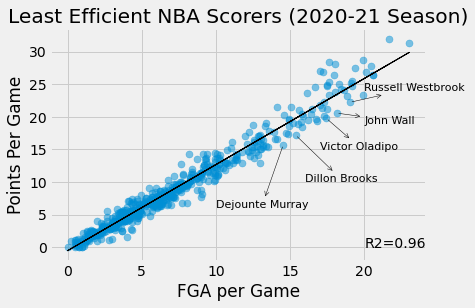

<Figure size 1728x1152 with 0 Axes>

In [15]:
x, y = df21.FGA/df21.GP, df21.PTS/df21.GP 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     


# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)   

# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=50, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black', linewidth=1)                    # line: Add line for regression line w/ predicted values
plt.title('Least Efficient NBA Scorers (2020-21 Season)')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(20,0, f'R2={r2}')                                  # 10, 25 are the coordinates for our text. Adjust accordingly

#_______________________________________________________________________________________________________________________#


# In order to point out my 10 least efficient players on the graph, I used plt.annotate and plugged in the
# indexes from 'player_index2' list with lines drawn to their dots
# for i in range(len(player_index21_2) - 4):
#     plt.annotate(least_efficient21_df.PLAYER[player_index21_2[i]], 
#                  (x[player_index21_2[i]], y[player_index21_2[i]]), 
#                  (x[player_index21_2[i]]-random.randint(0,10), y[player_index21_2[i]]-random.randint(0,14)),
#                  arrowprops=dict(arrowstyle='-', color = 'black'))

plt.annotate(least_efficient21_df.PLAYER[player_index21_2[0]], 
                 (x[player_index21_2[0]], y[player_index21_2[0]]), 
                 (10, 6),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(least_efficient21_df.PLAYER[player_index21_2[1]], 
                 (x[player_index21_2[1]], y[player_index21_2[1]]), 
                 (20, 19),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(least_efficient21_df.PLAYER[player_index21_2[2]], 
                 (x[player_index21_2[2]], y[player_index21_2[2]]), 
                 (17, 15),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(least_efficient21_df.PLAYER[player_index21_2[3]], 
                 (x[player_index21_2[3]], y[player_index21_2[3]]), 
                 (16, 10),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(least_efficient21_df.PLAYER[player_index21_2[4]], 
                 (x[player_index21_2[4]], y[player_index21_2[4]]), 
                 (20, 24),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(24, 16))
print(' ')


In [16]:
# Below is a printed out DataFrame of the ten least efficient scorers in the NBA (with at least 500 shot attempts), and on the far right you can see exactly how much they fall short of their expected points per game.

least_efficient21_df['ExPPG - PPG'] = score[player_index21_2]
least_efficient21_df.loc[:, 'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG,ExPPG - PPG
51,Dejounte Murray,SAS,67,2139,441,974,0.453,63,199,0.317,...,101,7,117,135,1051,1317,3.10,0.86,15.686567,-2.981391
91,John Wall,HOU,40,1288,293,726,0.404,79,249,0.317,...,42,31,141,46,823,673,1.95,0.30,20.575000,-2.857821
145,Victor Oladipo,MIA,33,1080,235,576,0.408,78,239,0.326,...,46,14,83,81,652,565,1.82,0.55,19.757576,-2.757993
43,Dillon Brooks,MEM,67,1997,432,1031,0.419,128,372,0.344,...,78,26,119,237,1151,854,1.32,0.66,17.179104,-2.610924
18,Russell Westbrook,WAS,65,2369,544,1238,0.439,86,273,0.315,...,89,23,312,190,1445,1922,2.45,0.28,22.230769,-2.384012
10,Nikola Vucevic,CHI,70,2348,666,1396,0.477,176,440,0.400,...,65,48,126,137,1639,1957,2.13,0.52,23.414286,-2.383180
150,Elfrid Payton,NYK,63,1484,269,622,0.432,28,98,0.286,...,47,9,103,116,639,624,1.97,0.46,10.142857,-2.373242
22,Anthony Edwards,MIN,72,2314,505,1211,0.417,171,520,0.329,...,82,36,160,129,1392,1130,1.32,0.51,19.333333,-2.344584
114,Darius Bazley,OKC,55,1714,273,690,0.396,83,286,0.290,...,29,25,122,60,754,711,0.81,0.24,13.709091,-2.331754


In [17]:
# This is a section on the most underutilized players and most overutilized players in the NBA - based on how they performed against the line of regression.

df21['Shots per Game'] = df21['FGA'] / df21['GP']

x = df21.nlargest(100, ['PTS'])
df21

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG,Shots per Game
0,201939,1,Stephen Curry,GSW,63,2152,658,1365,0.482,337,...,77,8,213,119,2015,1855,1.70,0.36,31.984127,21.666667
1,203081,2,Damian Lillard,POR,67,2398,602,1334,0.451,275,...,62,17,203,102,1928,1825,2.49,0.30,28.776119,19.910448
2,203999,3,Nikola Jokic,DEN,72,2488,732,1293,0.566,92,...,95,48,222,192,1898,2585,2.70,0.43,26.361111,17.958333
3,203078,4,Bradley Beal,WAS,60,2147,670,1382,0.485,130,...,69,22,187,140,1878,1567,1.42,0.37,31.300000,23.033333
4,1629029,5,Luka Doncic,DAL,66,2262,647,1351,0.479,192,...,64,36,281,152,1830,1912,2.02,0.23,27.727273,20.469697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,1628394,536,Anzejs Pasecniks,WAS,1,6,0,1,0.000,0,...,0,0,5,2,0,-4,0.20,0.00,0.000000,1.000000
536,1630204,536,Ashton Hagans,MIN,2,4,0,0,0.000,0,...,0,0,1,0,0,-1,0.00,0.00,0.000000,0.000000
537,204222,536,Greg Whittington,DEN,4,12,0,3,0.000,0,...,0,0,0,0,0,-3,0.00,0.00,0.000000,0.750000
538,203943,536,Noah Vonleh,BKN,4,11,0,3,0.000,0,...,0,0,2,2,0,-3,0.50,0.00,0.000000,0.750000


In [18]:
print(round(x['Shots per Game'].mean(), 2), 'average shots per game for the top 100 scorers in the 2020-21 NBA season.')

14.51 average shots per game for the top 100 scorers in the 2020-21 NBA season.


In [19]:
df21['Score'] =  score
df21

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG,Shots per Game,Score
0,201939,1,Stephen Curry,GSW,63,2152,658,1365,0.482,337,...,8,213,119,2015,1855,1.70,0.36,31.984127,21.666667,3.913086
1,203081,2,Damian Lillard,POR,67,2398,602,1334,0.451,275,...,17,203,102,1928,1825,2.49,0.30,28.776119,19.910448,3.021400
2,203999,3,Nikola Jokic,DEN,72,2488,732,1293,0.566,92,...,48,222,192,1898,2585,2.70,0.43,26.361111,17.958333,3.181084
3,203078,4,Bradley Beal,WAS,60,2147,670,1382,0.485,130,...,22,187,140,1878,1567,1.42,0.37,31.300000,23.033333,1.426428
4,1629029,5,Luka Doncic,DAL,66,2262,647,1351,0.479,192,...,36,281,152,1830,1912,2.02,0.23,27.727273,20.469697,1.234945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,1628394,536,Anzejs Pasecniks,WAS,1,6,0,1,0.000,0,...,0,5,2,0,-4,0.20,0.00,0.000000,1.000000,-0.813255
536,1630204,536,Ashton Hagans,MIN,2,4,0,0,0.000,0,...,0,1,0,0,-1,0.00,0.00,0.000000,0.000000,0.505670
537,204222,536,Greg Whittington,DEN,4,12,0,3,0.000,0,...,0,0,0,0,-3,0.00,0.00,0.000000,0.750000,-0.483524
538,203943,536,Noah Vonleh,BKN,4,11,0,3,0.000,0,...,0,2,2,0,-3,0.50,0.00,0.000000,0.750000,-0.483524


In [20]:
var1 = df21['Score'] > 2
var2 = df21['Shots per Game'] <= 14
var3 = df21['FGA'] >= 200
df21[var1 & var2 & var3].loc[:, 'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG,Shots per Game,Score
37,Bam Adebayo,MIA,64,2143,456,800,0.570,2,8,0.250,...,66,169,145,1197,1673,2.05,0.44,18.703125,12.500000,2.722231
56,Rudy Gobert,UTA,71,2187,391,579,0.675,0,4,0.000,...,190,118,163,1015,1847,0.75,0.34,14.295775,8.154930,4.045703
68,Montrezl Harrell,LAL,69,1580,375,603,0.622,0,10,0.000,...,49,74,128,931,1150,0.99,0.62,13.492754,8.739130,2.472165
75,Richaun Holmes,SAC,61,1781,366,575,0.637,2,11,0.182,...,96,75,213,869,1290,1.35,0.52,14.245902,9.426230,2.319081
101,Jarrett Allen,CLE,63,1864,298,482,0.618,6,19,0.316,...,90,100,96,806,1295,1.06,0.32,12.793651,7.650794,3.208497
146,Ivica Zubac,LAC,72,1609,257,394,0.652,1,4,0.250,...,62,81,187,650,1091,1.11,0.30,9.027778,5.472222,2.315996
221,DeAndre Jordan,BKN,57,1246,190,249,0.763,0,1,0.000,...,65,85,116,426,838,1.09,0.20,7.473684,4.368421,2.217734
243,Daniel Gafford,WAS,54,791,154,225,0.684,0,0,0.000,...,75,41,98,380,593,0.71,0.63,7.037037,4.166667,2.047186


The players above all score at least two points ABOVE their expected points total while taking less shots per game than the average of the top 100 scorers in the league. These players should be shooting more often.

In [21]:
var1 = df21['Score'] <= (-2)
var2 = df21['Shots per Game'] >= 14
var3 = df21['FGA'] >= 500
df21[var1 & var2].loc[:, 'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG,Shots per Game,Score
10,Nikola Vucevic,CHI,70,2348,666,1396,0.477,176,440,0.400,...,48,126,137,1639,1957,2.13,0.52,23.414286,19.942857,-2.383180
18,Russell Westbrook,WAS,65,2369,544,1238,0.439,86,273,0.315,...,23,312,190,1445,1922,2.45,0.28,22.230769,19.046154,-2.384012
22,Anthony Edwards,MIN,72,2314,505,1211,0.417,171,520,0.329,...,36,160,129,1392,1130,1.32,0.51,19.333333,16.819444,-2.344584
43,Dillon Brooks,MEM,67,1997,432,1031,0.419,128,372,0.344,...,26,119,237,1151,854,1.32,0.66,17.179104,15.388060,-2.610924
51,Dejounte Murray,SAS,67,2139,441,974,0.453,63,199,0.317,...,7,117,135,1051,1317,3.10,0.86,15.686567,14.537313,-2.981391
61,Caris LeVert,IND,47,1485,359,814,0.441,84,258,0.326,...,30,102,105,948,912,2.40,0.65,20.170213,17.319149,-2.166778
91,John Wall,HOU,40,1288,293,726,0.404,79,249,0.317,...,31,141,46,823,673,1.95,0.30,20.575000,18.150000,-2.857821
145,Victor Oladipo,MIA,33,1080,235,576,0.408,78,239,0.326,...,14,83,81,652,565,1.82,0.55,19.757576,17.454545,-2.757993


The players above all score at least two points BELOW their expected points total while taking more shots per game than the average of the top 100 scorers in the league. These players should be shooting less often.

Now we will do the same analysis for the 2010-11 season

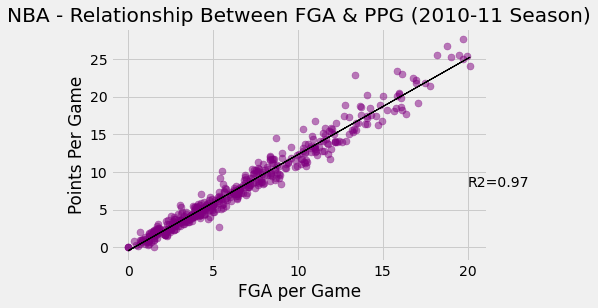

<Figure size 1728x1152 with 0 Axes>

In [22]:
# Do it all again for the 2010-11 season

# Here we access the leagueleaders module through endpoints & assign the class to "data"
data = leagueleaders.LeagueLeaders(
    season = '2010-11',
    season_type_all_star = 'Regular Season'
) 

# Our "data" variable now has built in functions such as creating a dataframe for our data
df = data.league_leaders.get_data_frame()

# Create a variable for points per game 
df['PPG'] = df['PTS'] / df['GP']

# # First we need to get per game stats.
# # We divide each variable by games played (GP) to get per game average
x, y = df.FGA/df.GP, df.PTS/df.GP 

# # we have to reshape our array from 1d to 2d. 
# # The proper shaped array is an input requirement for the linear model
# # reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     

# """ Build and fit linea regression model """
# # create an object that contains the linear model class
# # Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# # Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# # Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)   

# # Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=50, alpha=.5, color='purple')                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black', linewidth=1)                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA & PPG (2010-11 Season)')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(20,8, f'R2={r2}')                                   # 10, 25 are the coordinates for our text. Adjust accordingly
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24, 16))
print('')

In [23]:
# create an array of values 'score'
# These values were (POINTS PER GAME - EXPECTED POINTS PER GAME)
# In other words, the players who were BEST outperforming our line of regression

score = (y - predicted_y)

# Using heapq to find the indexes of the 10 largest PPG - ExPPG in the NBA (most efficient players) and storing
# Them to player_index
player_index = heapq.nlargest(11, range(len(score)), score.take)

# A new list to store information from the original DataFrame
most_efficient = []

# Using our original DataFrame, appending all player information for my 10 most efficient players to my
# 'most_efficient' list
for i in range(len(player_index)):
    most_efficient.append(df.loc[player_index[i]])

# Creating a new DataFrame called 'most_efficient_DF' from my 'most_efficient' list
most_efficient_df = pd.DataFrame(most_efficient)

# Creating a filter for at least 500 shot attempts
most_efficient_df = most_efficient_df[most_efficient_df['FGA'] > 500]

# Resetting player_index list so that it only contains those with at least 500 shot attempts
player_index = most_efficient_df.index

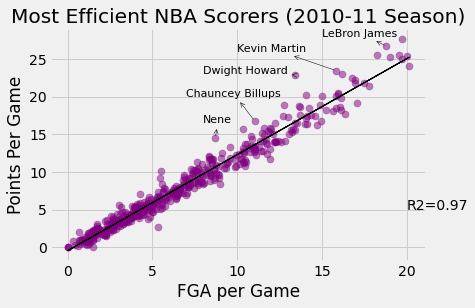

<Figure size 1728x1152 with 0 Axes>

In [24]:
plt.scatter(x, y, s=50, alpha=.5, color='purple')                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black', linewidth=1)                    # line: Add line for regression line w/ predicted values
plt.title('Most Efficient NBA Scorers (2010-11 Season)')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(20,5, f'R2={r2}')                                   # 10, 25 are the coordinates for our text. Adjust accordingly


# for i in range(len(player_index) - 5):
#     plt.annotate(most_efficient_df.PLAYER[player_index[i]], 
#                  (x[player_index[i]], y[player_index[i]]), 
#                  (x[player_index[i]]-random.randint(0,11), y[player_index[i]]-random.randint(0,14)),
#                  arrowprops=dict(arrowstyle='-', color = 'black'))



plt.annotate(most_efficient_df.PLAYER[player_index[0]], 
                 (x[player_index[0]], y[player_index[0]]), 
                 (8, 23),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(most_efficient_df.PLAYER[player_index[1]], 
                 (x[player_index[1]], y[player_index[1]]), 
                 (8, 16.5),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(most_efficient_df.PLAYER[player_index[4]], 
                 (x[player_index[4]], y[player_index[4]]), 
                 (7, 20),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(most_efficient_df.PLAYER[player_index[2]], 
                 (x[player_index[2]], y[player_index[2]]), 
                 (10, 26),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(most_efficient_df.PLAYER[player_index[3]], 
                 (x[player_index[3]], y[player_index[3]]), 
                 (15, 28),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(24, 16))
print(' ')

In [25]:
most_efficient_df['PPG - ExPPG'] = score[player_index]
most_efficient_df.loc[:,'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG,PPG - ExPPG
11,Dwight Howard,ORL,78,2935,619,1044,0.593,0,7,0.000,...,107,186,279,258,1784,2208,0.38,0.38,22.871795,6.250469
60,Nene,DEN,75,2291,402,654,0.615,1,5,0.200,...,84,73,134,238,1091,1466,1.11,0.63,14.546667,3.873723
8,Kevin Martin,HOU,80,2603,553,1267,0.436,176,459,0.383,...,80,15,184,155,1876,1454,1.08,0.43,23.450000,3.700722
1,LeBron James,MIA,79,3063,758,1485,0.510,92,279,0.330,...,124,50,284,163,2111,2258,1.95,0.44,26.721519,3.197648
44,Chauncey Billups,NYK,72,2310,339,794,0.427,146,363,0.402,...,71,14,177,146,1208,1203,2.19,0.40,16.777778,3.161924
18,Paul Pierce,BOS,80,2774,507,1021,0.497,111,297,0.374,...,80,51,171,231,1511,1584,1.52,0.47,18.887500,3.059504
0,Kevin Durant,OKC,78,3038,711,1538,0.462,145,414,0.350,...,88,76,218,159,2161,1946,0.98,0.40,27.705128,3.007448
90,Danilo Gallinari,DEN,62,2104,265,640,0.414,103,293,0.352,...,51,27,83,144,970,945,1.25,0.61,15.645161,2.928585
13,Dirk Nowitzki,DAL,73,2504,610,1179,0.517,66,168,0.393,...,38,47,137,172,1681,1715,1.39,0.28,23.027397,2.878741
6,Dwyane Wade,MIA,76,2823,692,1384,0.500,63,206,0.306,...,111,87,237,197,1941,1883,1.46,0.47,25.539474,2.764079


In [26]:
# create an array of values 'score'
# These values were (POINTS PER GAME - EXPECTED POINTS PER GAME)
# In other words, the players who were least outperforming our line of regression while taking 500 shots

score = (y - predicted_y)

# Using heapq to find the indexes of the 10 smallest PPG - ExPPG in the NBA (least efficient players) and storing
# Them to player_index
player_index2 = heapq.nsmallest(20, range(len(score)), score.take)

# A new list to store information from the original DataFrame
least_efficient = []

# Using our original DataFrame, appending all player information for my 10 least efficient players to my
# 'least_efficient' list
for i in range(len(player_index2)):
    least_efficient.append(df.loc[player_index2[i]])

# Creating a new DataFrame called 'least_efficient_DF' from my 'least_effecient' list
least_efficient_df = pd.DataFrame(least_efficient)

# Creating a filter for at least 500 shot attempts
least_efficient_df = least_efficient_df[least_efficient_df['FGA'] > 700]

# Resetting player_index2 list so that it only contains those with at least 500 shot attempts
player_index2 = least_efficient_df.index

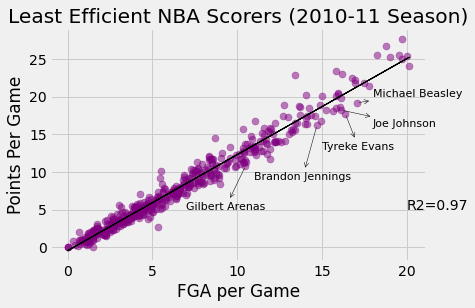

<Figure size 1728x1152 with 0 Axes>

In [27]:
x, y = df.FGA/df.GP, df.PTS/df.GP 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     


# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)   

# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=50, alpha=.5, color='purple')                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black', linewidth=1)                    # line: Add line for regression line w/ predicted values
plt.title('Least Efficient NBA Scorers (2010-11 Season)')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(20,5, f'R2={r2}')                                  # 10, 25 are the coordinates for our text. Adjust accordingly

# ______________________________________________________________________________________________________________________________ #

# In order to point out my 10 least efficient players on the graph, I used plt.annotate and plugged in the
# indexes from 'player_index2' list with lines drawn to their dots
# for i in range(len(player_index2) - 4):
#     plt.annotate(least_efficient_df.PLAYER[player_index2[i]], 
#                  (x[player_index2[i]], y[player_index2[i]]), 
#                  (x[player_index2[i]]-random.randint(0,10), y[player_index2[i]]-random.randint(0,14)),
#                  arrowprops=dict(arrowstyle='-', color = 'black'))




plt.annotate(least_efficient_df.PLAYER[player_index2[0]], 
                 (x[player_index2[0]], y[player_index2[0]]), 
                 (15, 13),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(least_efficient_df.PLAYER[player_index2[1]], 
                 (x[player_index2[1]], y[player_index2[1]]), 
                 (7, 5),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(least_efficient_df.PLAYER[player_index2[4]], 
                 (x[player_index2[4]], y[player_index2[4]]), 
                 (18, 16),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(least_efficient_df.PLAYER[player_index2[2]], 
                 (x[player_index2[2]], y[player_index2[2]]), 
                 (18, 20),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.annotate(least_efficient_df.PLAYER[player_index2[3]], 
                 (x[player_index2[3]], y[player_index2[3]]), 
                 (11, 9),
                 arrowprops=dict(arrowstyle='<-', color = 'black'),
                 fontsize=11)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(24, 16))
print(' ')

In [28]:
# Below is a printed out DataFrame of the ten least efficient scorers in the NBA (with at least 500 shot attempts), and on the far right you can see exactly how much they fall short of their expected points per game.

least_efficient_df['ExPPG - PPG'] = score[player_index2]
least_efficient_df.loc[:, 'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG,ExPPG - PPG
80,Tyreke Evans,SAC,57,2107,382,933,0.409,43,148,0.291,...,85,30,184,143,1012,925,1.73,0.46,17.754386,-2.671930
131,Gilbert Arenas,ORL,70,1796,269,734,0.366,97,327,0.297,...,74,21,177,188,755,638,1.55,0.42,10.785714,-2.138892
25,Michael Beasley,MIN,73,2361,561,1246,0.450,60,164,0.366,...,54,52,195,222,1401,1122,0.81,0.28,19.191781,-2.127277
79,Brandon Jennings,MIL,63,2169,361,926,0.390,98,303,0.323,...,95,21,146,131,1019,916,2.09,0.65,16.174603,-2.122095
34,Joe Johnson,ATL,72,2554,514,1161,0.443,89,300,0.297,...,47,7,146,131,1312,1154,2.31,0.32,18.222222,-1.893680
59,Tayshaun Prince,DET,78,2562,473,1001,0.473,34,98,0.347,...,30,41,82,90,1098,1053,2.62,0.37,14.076923,-1.841400
65,Andray Blatche,WAS,64,2172,426,957,0.445,4,18,0.222,...,98,51,172,182,1076,1129,0.84,0.57,16.812500,-1.809011
130,Travis Outlaw,NJN,82,2358,274,731,0.375,76,252,0.302,...,34,36,71,148,756,668,1.18,0.48,9.219512,-1.701631
116,O.J. Mayo,MEM,71,1869,304,747,0.407,96,264,0.364,...,73,26,99,127,803,643,1.47,0.74,11.309859,-1.659906
113,Mo Williams,LAC,58,1789,291,730,0.399,79,244,0.324,...,53,10,171,150,812,772,2.22,0.31,14.000000,-1.603184


In [29]:
# This is a section on the most underutilized players and most overutilized players in the NBA - based on how they performed against the line of regression.

df['Shots per Game'] = df['FGA'] / df['GP']

x = df.nlargest(100, ['PTS'])

In [30]:
print(round(x['Shots per Game'].mean(), 2), 'average shots per game for the top 100 scorers in the 2010-11 NBA season.')

13.28 average shots per game for the top 100 scorers in the 2010-11 NBA season.


In [31]:
df['Score'] =  score
df

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG,Shots per Game,Score
0,201142,1,Kevin Durant,OKC,78,3038,711,1538,0.462,145,...,76,218,159,2161,1946,0.98,0.40,27.705128,19.717949,3.007448
1,2544,2,LeBron James,MIA,79,3063,758,1485,0.510,92,...,50,284,163,2111,2258,1.95,0.44,26.721519,18.797468,3.197648
2,977,3,Kobe Bryant,LAL,82,2779,740,1639,0.451,115,...,12,243,172,2078,1754,1.60,0.41,25.341463,19.987805,0.299659
3,201565,4,Derrick Rose,CHI,81,3026,711,1597,0.445,128,...,51,278,136,2026,1872,2.24,0.31,25.012346,19.716049,0.317087
4,2405,5,Amar'e Stoudemire,NYK,78,2870,744,1482,0.502,10,...,150,250,274,1971,1918,0.81,0.28,25.269231,19.000000,1.487088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,689,443,Theo Ratliff,LAL,10,71,1,6,0.167,0,...,5,3,7,2,15,1.00,0.67,0.200000,0.600000,-0.118206
448,2250,449,Bobby Simmons,SAS,2,16,0,3,0.000,0,...,0,0,2,0,-1,0.00,0.00,0.000000,1.500000,-1.465899
449,1730,449,Brian Skinner,MIL,2,6,0,0,0.000,0,...,0,0,0,0,0,0.00,0.00,0.000000,0.000000,0.446922
450,202371,449,Gani Lawal,PHX,1,2,0,0,0.000,0,...,0,0,1,0,0,0.00,0.00,0.000000,0.000000,0.446922


In [32]:
var1 = df['Score'] > 2
var2 = df['Shots per Game'] <= 14
var3 = df['FGA'] >= 200
df[var1 & var2 & var3].loc[:, 'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG,Shots per Game,Score
11,Dwight Howard,ORL,78,2935,619,1044,0.593,0,7,0.000,...,186,279,258,1784,2208,0.38,0.38,22.871795,13.384615,6.250469
18,Paul Pierce,BOS,80,2774,507,1021,0.497,111,297,0.374,...,51,171,231,1511,1584,1.52,0.47,18.887500,12.762500,3.059504
44,Chauncey Billups,NYK,72,2310,339,794,0.427,146,363,0.402,...,14,177,146,1208,1203,2.19,0.40,16.777778,11.027778,3.161924
60,Nene,DEN,75,2291,402,654,0.615,1,5,0.200,...,73,134,238,1091,1466,1.11,0.63,14.546667,8.720000,3.873723
90,Danilo Gallinari,DEN,62,2104,265,640,0.414,103,293,0.352,...,27,83,144,970,945,1.25,0.61,15.645161,10.322581,2.928585
134,Tyson Chandler,DAL,74,2059,266,407,0.654,0,0,0.000,...,80,88,240,748,1280,0.36,0.41,10.108108,5.500000,3.541354
169,Andrew Bynum,LAL,54,1500,237,413,0.574,0,0,0.000,...,106,74,140,612,997,0.99,0.26,11.333333,7.648148,2.027230
184,DeAndre Jordan,LAC,80,2047,234,341,0.686,0,1,0.000,...,142,101,255,566,1039,0.42,0.41,7.075000,4.262500,2.086323
253,Shaquille O'Neal,BOS,37,752,134,201,0.667,0,0,0.000,...,42,56,120,341,422,0.46,0.29,9.216216,5.432432,2.735625


The players above all score at least two points ABOVE their expected points total while taking less shots per game than the average of the top 100 scorers in the league. These players should be shooting more often.

In [33]:
var1 = df['Score'] <= (-2)
var2 = df['Shots per Game'] >= 14
var3 = df['FGA'] >= 500
df[var1 & var2].loc[:, 'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG,Shots per Game,Score
25,Michael Beasley,MIN,73,2361,561,1246,0.450,60,164,0.366,...,52,195,222,1401,1122,0.81,0.28,19.191781,17.068493,-2.127277
79,Brandon Jennings,MIL,63,2169,361,926,0.390,98,303,0.323,...,21,146,131,1019,916,2.09,0.65,16.174603,14.698413,-2.122095
80,Tyreke Evans,SAC,57,2107,382,933,0.409,43,148,0.291,...,30,184,143,1012,925,1.73,0.46,17.754386,16.368421,-2.671930


The players above all score at least two points BELOW their expected points total while taking more shots per game than the average of the top 100 scorers in the league. These players should be shooting less often.

Code borrowed from https://github.com/wmblack23/NBA_API_Scoring_Efficiencies/blob/main/NBA_Regression.ipynb